<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk2_Structure_Viz_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choose an appropriate structure to Visualize the data


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
sns.set_theme(style='darkgrid', font_scale = 1.5,
              rc={'figure.figsize':(7,5)})

In [3]:
titanic = sns.load_dataset('titanic')

Like scikit-learn, Seaborn has "toy" datasets available to import for exploration. Let's load the Seaborn Titanic dataset and take a look.

(https://github.com/mwaskom/seaborn-data shows the datasets available to load via this method in Seaborn.)

## Rudimentary EDA

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.shape

(891, 15)

In [7]:
titanic.size

13365

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualiza Titanic 

In this notebook, we will use a familiar dataset to explore the use of visualizations in feature analysis and selection.

The objective is to work through some of the visualization capabilities available in Seaborn. For a more thorough investigation of the capabilities offered by Seaborn, you are encouraged to do the full tutorial linked below. Seaborn is an API to matplotlib. It integrates with pandas dataframes, simplifying the process of visualizing data. It provides simple functions for plotting.

Some of the features that seaborn offers are

    * Several built-in themes that improve the default matplotlib aesthetics.
    
    * Tools for choosing color palettes that reveal patterns in your data.
    
    * Functions for visualizing univariate and bivariate distributions for comparison.
   
    * Tools that fit and visualize linear regression models.
    
    * ... ...

Seaborn Tutorial: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html

### Survival vs Age

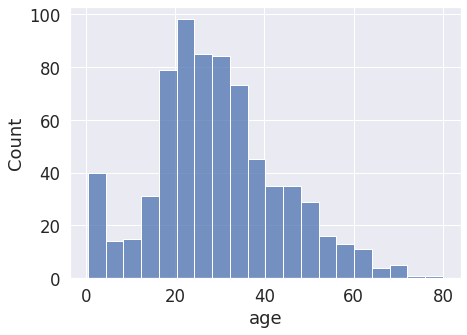

In [8]:
sns.histplot(titanic["age"]);

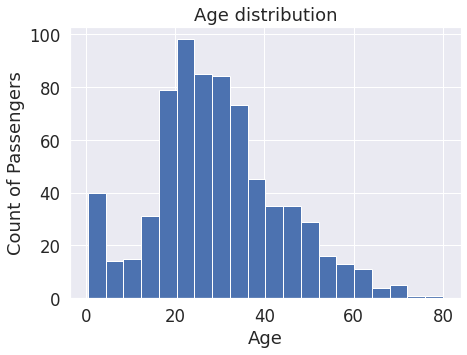

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(titanic['age'], bins = 20, range = (titanic['age'].min(),titanic['age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

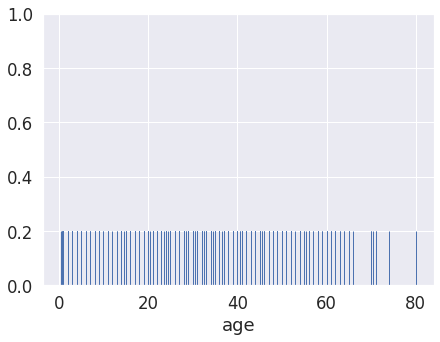

In [ ]:
sns.rugplot(titanic["age"], height = 0.2)
plt.gca().set_ylim([0, 1]);

https://seaborn.pydata.org/generated/seaborn.rugplot.html

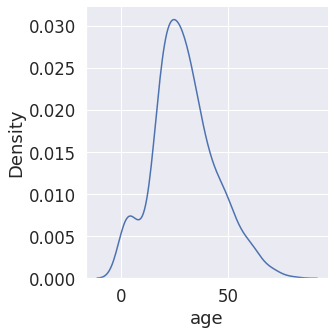

In [ ]:
sns.displot(titanic["age"], kind = "kde");
plt.savefig("titanic_displot.png", bbox_inches = "tight", dpi = 300)

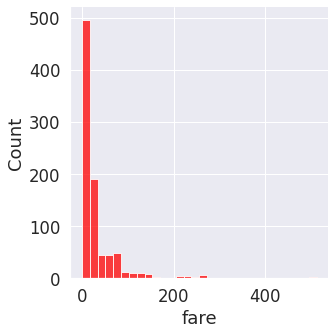

In [ ]:
sns.displot(titanic['fare'],bins=30,kde=False,color='red')

### Displaying passenger and age over a boxplot

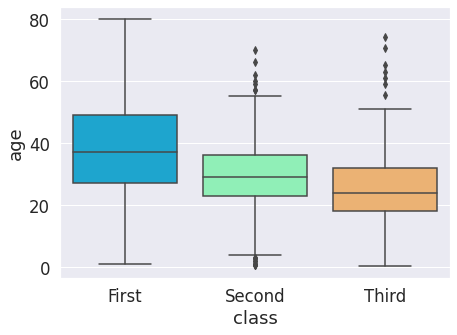

In [ ]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


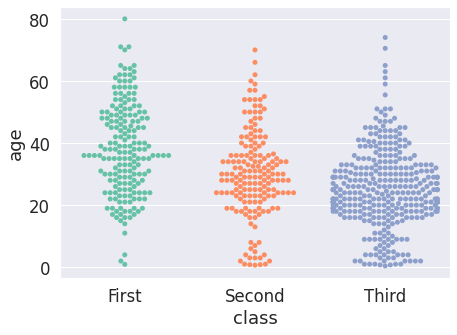

In [ ]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

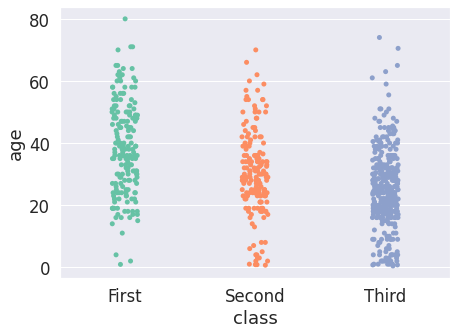

In [ ]:
sns.stripplot(x='class',y='age',data=titanic,palette='Set2')

### A simple count plot displying the number of passanger by sex

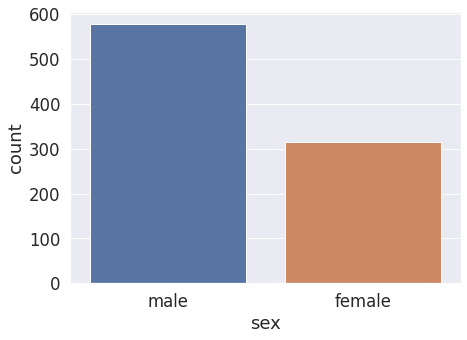

In [ ]:
sns.countplot(x='sex',data=titanic)

### A heatmap showing the correlations for the entire dataset

Text(0.5, 1.0, 'titanic.corr()')

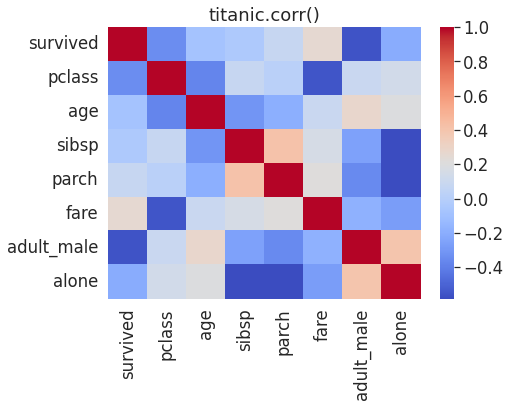

In [ ]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')

### Two histograms using FacetGrid based on age and sex

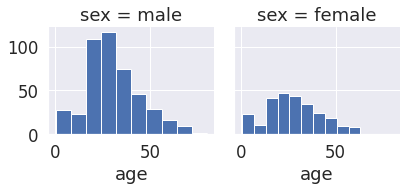

In [ ]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')

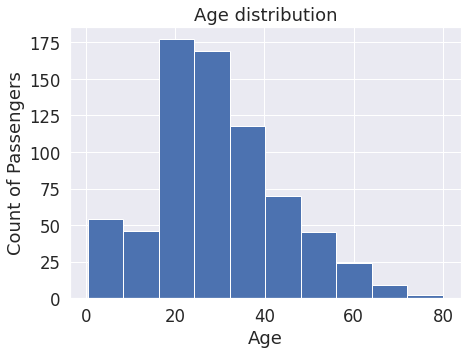

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(titanic['age'], bins = 10, range = (titanic['age'].min(),titanic['age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

### Categorical Data: Catplot

https://seaborn.pydata.org/generated/seaborn.catplot.html

**Categorical scatterplots:**

    stripplot() (with kind="strip"; the default)

    swarmplot() (with kind="swarm")

**Categorical distribution plots:**

    boxplot() (with kind="box")

    violinplot() (with kind="violin")

    boxenplot() (with kind="boxen")

**Categorical estimate plots:**

    pointplot() (with kind="point")

    barplot() (with kind="bar")

    countplot() (with kind="count")

By default, the visual representation will be a jittered strip plot:

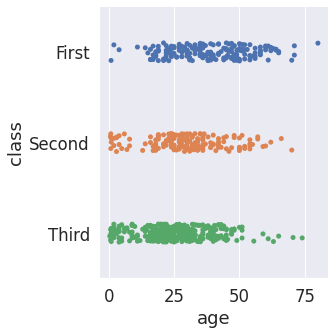

In [ ]:
sns.catplot(data=titanic, x="age", y="class")

Use kind to select a different representation:

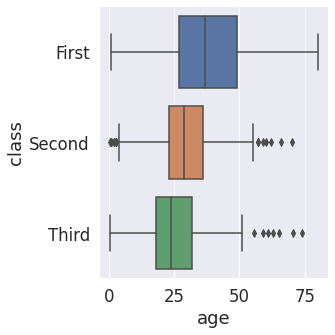

In [ ]:
sns.catplot(data=titanic, x="age", y="class", kind="box")

One advantage is that the legend will be automatically placed outside the plot:

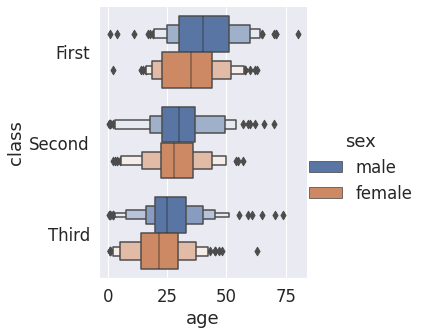

In [ ]:
sns.catplot(data=titanic, x="age", y="class", hue="sex", kind="boxen")

Additional keyword arguments get passed through to the underlying seaborn function:

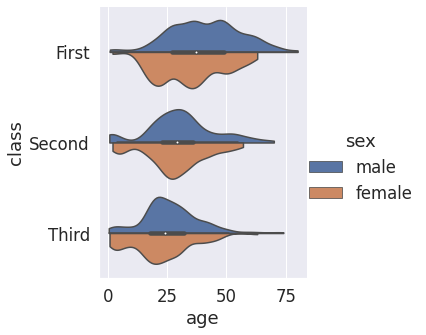

In [ ]:
sns.catplot(
    data=titanic, x="age", y="class", hue="sex",
    kind="violin", bw=.25, cut=0, split=True,
)

Assigning a variable to col or row will automatically create subplots. Control figure size with the height and aspect parameters:

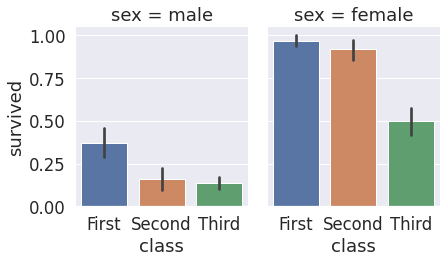

In [ ]:
sns.catplot(
    data=titanic, x="class", y="survived", col="sex",
    kind="bar", height=4, aspect=.8,
)

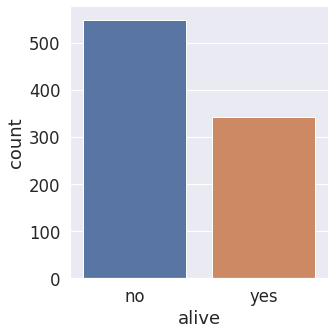

In [ ]:
sns.catplot(x = "alive", data = titanic, kind = "count")

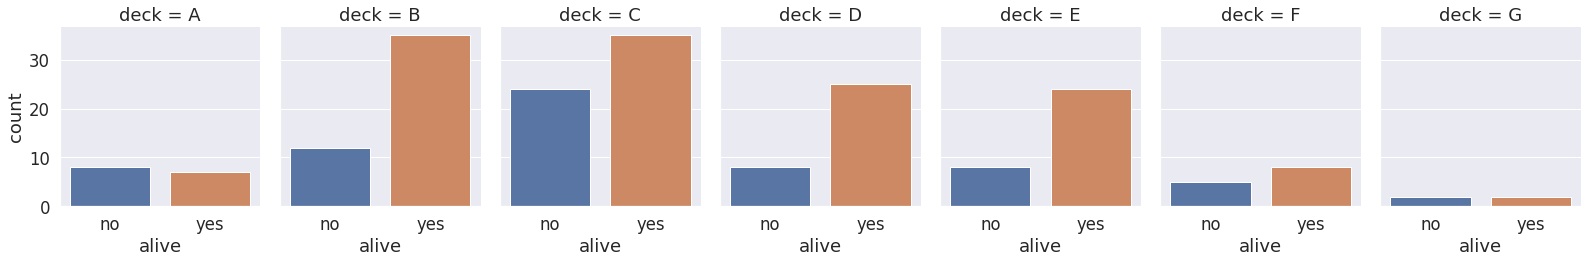

In [ ]:
sns.catplot(
    data=titanic, x="alive", col="deck",
    kind="count", height=4, aspect=.8,
)

For single-subplot figures, it is easy to layer different representations:

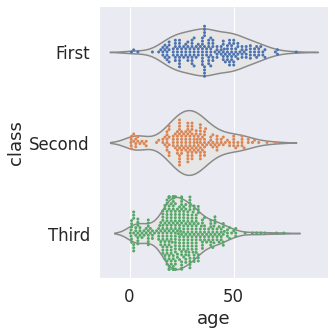

In [ ]:
sns.catplot(data=titanic, x="age", y="class", kind="violin", color=".9", inner=None)
sns.swarmplot(data=titanic, x="age", y="class", size=3)

Use methods on the returned FacetGrid to tweak the presentation:

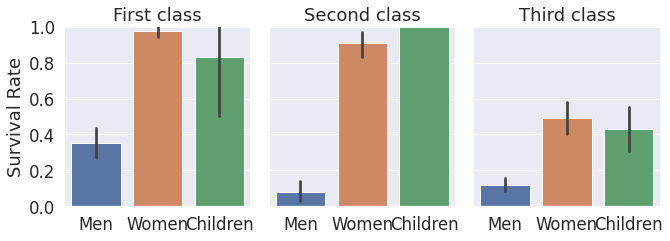

In [ ]:
g = sns.catplot(
    data=titanic, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.8,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

### Relationship: Pairplot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

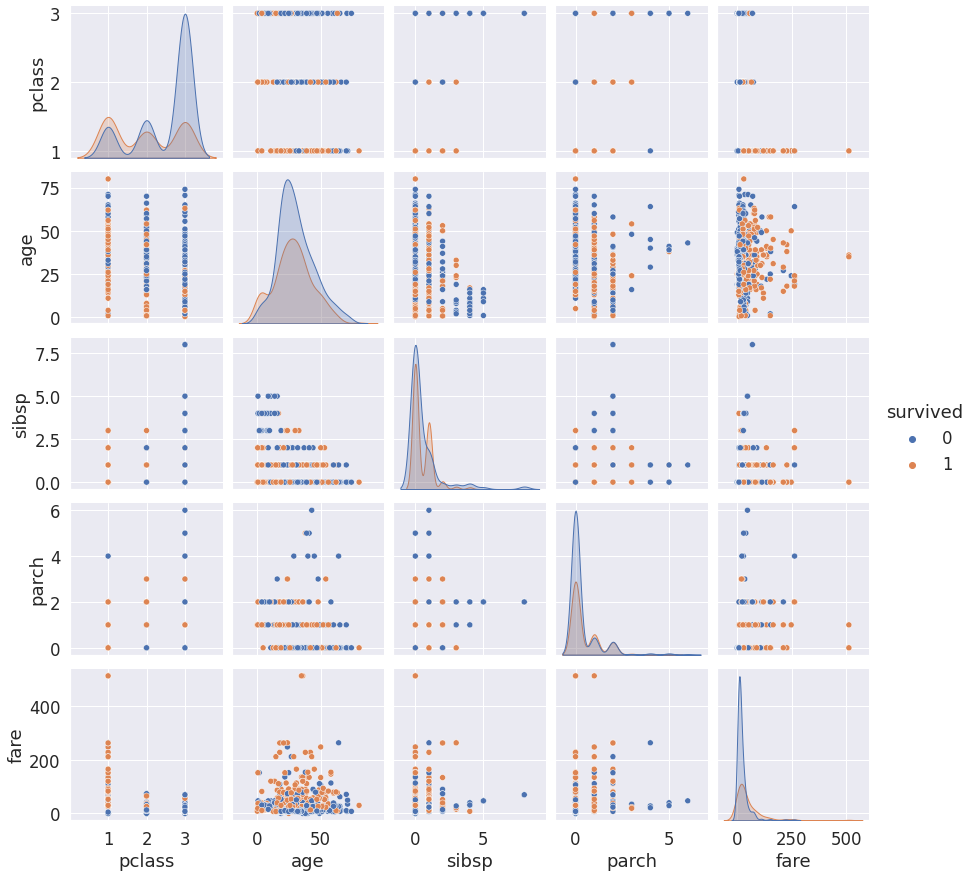

In [ ]:
g = sns.pairplot(data=titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']], hue='survived', dropna=True)

### Relationship: Joinplot

A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X).

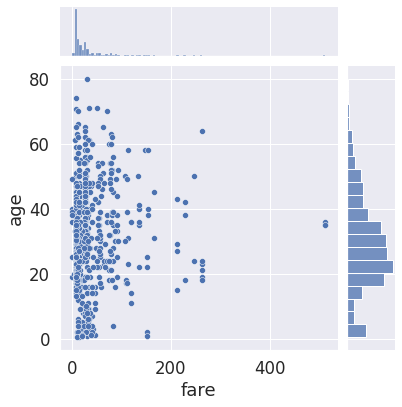

In [ ]:
g = sns.jointplot(data=titanic, x = "fare", y = "age")